In [ ]:
# Installation package kaggle
! pip install -q kaggle

In [ ]:
#Création d'un dossier kaggle
! mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
#Copier Kaggle.json dans le dossier kaggle
! cp '/content/drive/MyDrive/kaggle/kaggle.json' ~/.kaggle/

In [ ]:
#Donner les droits a kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                      COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           8951        267  1.0              
mattop/alcohol-consumption-per-capita-2016                     Alcohol Consumption Per Capita 2016                   4KB  2022-12-09 00:03:11            862         30  1.0              
thedevastator/jobs-dataset-from-glassdoor                      Salary Prediction                                     3MB  2022-11-16 13:52:31           5771        126  1.0              
swaptr/fifa-world-cup-2022-match-data                          FI

In [ ]:
! kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

 74% 585M/788M [00:19<00:06, 31.3MB/s]
User cancelled operation


In [ ]:
! unzip /content/microsoft-catsvsdogs-dataset.zip -d data

unzip:  cannot find or open /content/microsoft-catsvsdogs-dataset.zip, /content/microsoft-catsvsdogs-dataset.zip.zip or /content/microsoft-catsvsdogs-dataset.zip.ZIP.


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import random
import cv2
from tqdm import tqdm
import os
import zipfile
import keras
import shutil
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.image as mpimg
import PIL
from IPython.display import display, Image

In [3]:
SOURCE_DIR = "/content/drive/MyDrive/kaggle/data/PetImages"


In [4]:
training_data = []

CATEGORIES = ["Dog", "Cat"]
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(SOURCE_DIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            
                #img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE))  # convert to array
                #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([img, class_num])  # add this to our training_data
           
           

create_training_data()

100%|██████████| 12501/12501 [00:00<00:00, 811719.09it/s]


In [5]:
random.shuffle(training_data)
print(len(training_data))

25002


In [6]:
training_data[:12]

[['9906.jpg', 1],
 ['889.jpg', 0],
 ['11333.jpg', 0],
 ['2628.jpg', 1],
 ['357.jpg', 0],
 ['4963.jpg', 1],
 ['567.jpg', 1],
 ['11818.jpg', 1],
 ['11939.jpg', 1],
 ['2276.jpg', 1],
 ['8376.jpg', 1],
 ['5240.jpg', 0]]

In [7]:
X = []
y=[]
for simple in training_data:
  X.append(simple[0])
  y.append(simple[1])

In [8]:
X[:12]

['9906.jpg',
 '889.jpg',
 '11333.jpg',
 '2628.jpg',
 '357.jpg',
 '4963.jpg',
 '567.jpg',
 '11818.jpg',
 '11939.jpg',
 '2276.jpg',
 '8376.jpg',
 '5240.jpg']

In [9]:
y[:12]

[1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]

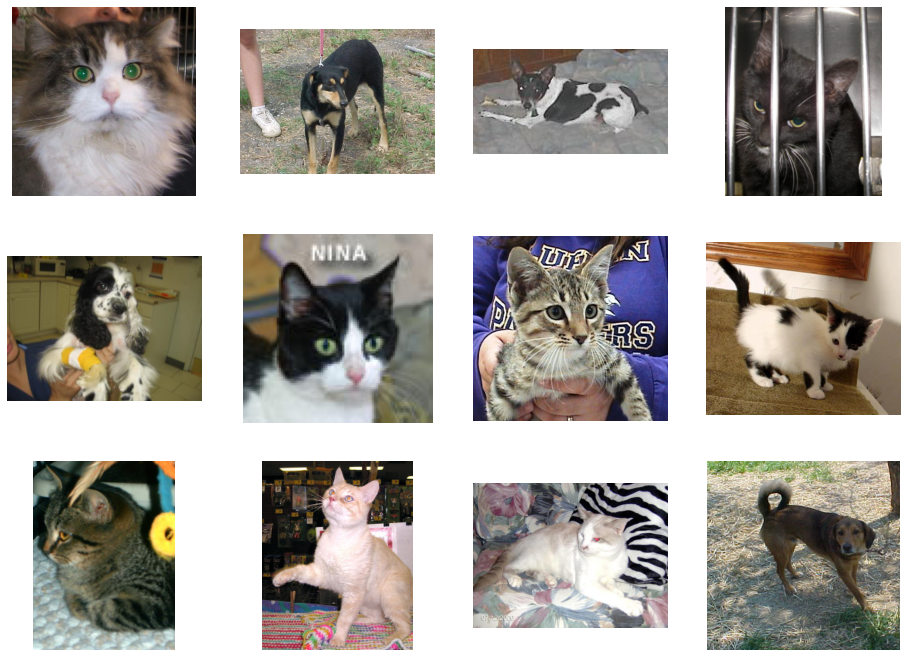

In [10]:
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(X[:12]):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  if y[i]==0 :
    img = mpimg.imread(os.path.join('/content/drive/MyDrive/kaggle/data/PetImages/Dog',img_path))
  else : 
    img = mpimg.imread(os.path.join('/content/drive/MyDrive/kaggle/data/PetImages/Cat',img_path))

  plt.imshow(img)
plt.show()

In [11]:
source_path_dogs = os.path.join(SOURCE_DIR, 'Dog')
source_path_cats = os.path.join(SOURCE_DIR, 'Cat')

In [12]:
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12501 images of dogs.
There are 12501 images of cats.


In [13]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [14]:
root_dir = '/content/drive/MyDrive/kaggle/working'

In [ ]:
os.path.exists(root_dir)

True

In [ ]:
projet_folder = "kaggle/working/"

In [15]:
import shutil
from shutil import copyfile

In [23]:


# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
 
  os.mkdir(root_path)
  train_dir = os.path.join(root_path, 'training')
  os.mkdir(train_dir)
  val_dir = os.path.join(root_path, 'validation')
  os.mkdir(val_dir)

  cat_train_dir = os.path.join(train_dir, 'cats')
  os.mkdir(cat_train_dir)
  dog_train_dir = os.path.join(train_dir, 'dogs')
  os.mkdir(dog_train_dir)

  cat_val_dir = os.path.join(val_dir, 'cats')
  os.mkdir(cat_val_dir)
  dog_val_dir = os.path.join(val_dir, 'dogs')
  os.mkdir(dog_val_dir)
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [24]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):


  source_list = os.listdir(SOURCE_DIR)
  
  train_list = random.sample(source_list, int(len(source_list)*SPLIT_SIZE))

  for img in source_list:
    if os.path.getsize(os.path.join(SOURCE_DIR, img)) == 0:
      print(img + "is zero length, so ignoring.")
    elif img in train_list:
       copyfile(os.path.join(SOURCE_DIR, img), os.path.join(TRAINING_DIR, img))
    else:
      copyfile(os.path.join(SOURCE_DIR, img), os.path.join(VALIDATION_DIR, img))

### CNN

In [25]:
# Define paths
CAT_SOURCE_DIR = "/content/drive/MyDrive/kaggle/data/PetImages/Cat"
DOG_SOURCE_DIR = "/content/drive/MyDrive/kaggle/data/PetImages/Dog"

TRAINING_DIR = "/content/drive/MyDrive/kaggle/working/training"
VALIDATION_DIR = "/content/drive/MyDrive/kaggle/working/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")


In [ ]:
os.path.exists('/content/drive/MyDrive/kaggle/work/train')

True

In [26]:
# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

In [28]:
# Define proportion of images used for training
split_size = .9


In [29]:
# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpgis zero length, so ignoring.
11702.jpgis zero length, so ignoring.


Original cat's directory has 12501 images
Original dog's directory has 12501 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1251 images of cats for validation
There are 1251 images of dogs for validation


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    # Instantiate the ImageDataGenerator class for both training and validation
    train_datagen = ImageDataGenerator(rescale=1/255)

    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

    validation_datagen = ImageDataGenerator(rescale=1/255)
   
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=20,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
    return train_generator, validation_generator

In [ ]:
train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


(<keras.preprocessing.image.DirectoryIterator at 0x7fc31e2400d0>,
 <keras.preprocessing.image.DirectoryIterator at 0x7fc398bf2a30>)

In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
# create_model for CNN using 4 CONVOLUTION LAYERS 
def create_model():
    model = tf.keras.models.Sequential([ 
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2), 
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(), 
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'), 
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
        tf.keras.layers.Dense(1, activation='sigmoid')
      ])
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']) 

    return model

In [ ]:
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=5,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/5
1125/1125 [==============================] - 560s 497ms/step - loss: 0.5754 - accuracy: 0.6843 - val_loss: 0.4450 - val_accuracy: 0.7996
Epoch 2/5
1125/1125 [==============================] - 562s 499ms/step - loss: 0.4298 - accuracy: 0.8004 - val_loss: 0.4028 - val_accuracy: 0.8204
Epoch 3/5
1125/1125 [==============================] - 560s 498ms/step - loss: 0.3480 - accuracy: 0.8446 - val_loss: 0.3162 - val_accuracy: 0.8656
Epoch 4/5
1125/1125 [==============================] - 557s 495ms/step - loss: 0.2845 - accuracy: 0.8786 - val_loss: 0.2974 - val_accuracy: 0.8696
Epoch 5/5
1125/1125 [==============================] - 573s 509ms/step - loss: 0.2237 - accuracy: 0.9066 - val_loss: 0.2742 - val_accuracy: 0.8848


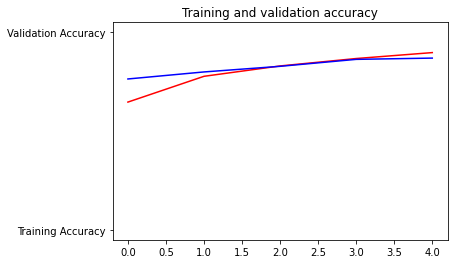

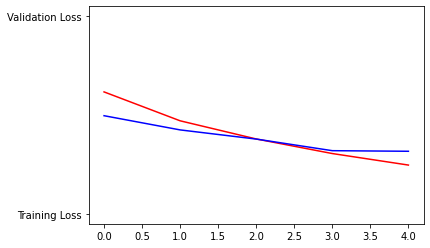

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

###  VGG16

In [36]:
trdata= ImageDataGenerator()
traindata= trdata.flow_from_directory(directory="/content/drive/MyDrive/kaggle/working/training", target_size=(224,224))
tsdata= ImageDataGenerator()
testdata= tsdata.flow_from_directory(directory="/content/drive/MyDrive/kaggle/working/validation", target_size=(224,224))

Found 22496 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [38]:
from keras.applications.vgg16 import VGG16
vgg_model= VGG16(weights = 'imagenet' , include_top=True)

553467096/553467096 [==============================] - 4s 0us/step


In [39]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [40]:
#the weights of th first 19 layers will not be trained
#Use the first 19 layers as it is, the "trainable" parameter is set to False

for layers in (vgg_model.layers)[:19]:
  print(layers)
  layers.trainable= False

In [41]:
#To detect 2 classes that are Dogs and Cats
#Final layer of VGG16 model is removed and replaced with 2 unit of dense layer

Z= vgg_model.layers[-2].output
predictions = Dense(2, activation="softmax")(Z)
model_final=Model(inputs= vgg_model.input, outputs= predictions)


In [42]:
model_final.compile(loss="categorical_crossentropy",
                    optimizer= optimizers.SGD(lr=0.0001, momentum=0.9),
                    metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [43]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [45]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint= ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbos=1, save_best_only=True, save_xeight_only=False, period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=40, verbose=1, mode='auto')

hist=model_final.fit_generator(generator= traindata, steps_per_epoch=2, epochs=5, validation_data= testdata,validation_steps=1, callbacks=[checkpoint, early])

<ipython-input-45-889d566658ea>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model_final.fit_generator(generator= traindata, steps_per_epoch=2, epochs=5, validation_data= testdata,validation_steps=1, callbacks=[checkpoint, early])


Epoch 1/5
2/2 [==============================] - 77s 57s/step - loss: 1.4574 - accuracy: 0.4375 - val_loss: 1.2810 - val_accuracy: 0.4688
Epoch 2/5
2/2 [==============================] - 70s 50s/step - loss: 0.8221 - accuracy: 0.6875 - val_loss: 0.3487 - val_accuracy: 0.8438
Epoch 3/5
2/2 [==============================] - 86s 62s/step - loss: 0.4268 - accuracy: 0.7969 - val_loss: 0.2169 - val_accuracy: 0.8750
Epoch 4/5
2/2 [==============================] - 54s 34s/step - loss: 0.1534 - accuracy: 0.9219 - val_loss: 0.2120 - val_accuracy: 0.9375
Epoch 5/5
2/2 [==============================] - 55s 40s/step - loss: 0.3019 - accuracy: 0.8594 - val_loss: 0.1914 - val_accuracy: 0.9688


In [46]:
model_final.save_weights("vgg16-1.h5")

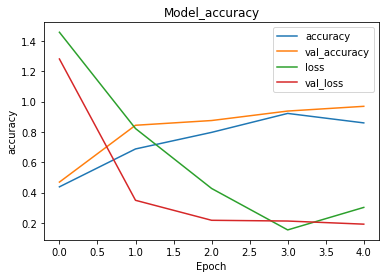

In [47]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model_accuracy")
plt.ylabel("accuracy")
plt.xlabel("Epoch")
plt.legend(["accuracy","val_accuracy","loss","val_loss"])
plt.show()